In [6]:
y = 3
sigma = 1
mu = 0
tau = 2

# std for proposal distribution
d = 1
niter = 10^4

# storing samples of theta
theta = rep(0, niter)

In [19]:
# intialize theta to the observed value y
theta[1] = y
for (i in 2:niter) {
    # a new proposal of theta
    theta.p = theta[i-1] + rnorm(1,0,d)
    r = dnorm(y, theta.p, sigma) * dnorm(theta.p, mu, tau) / (dnorm(y, theta[i-1], sigma) * dnorm(theta[i-1], mu, tau))
    flip = rbinom(1,1,min(r,1))
    theta[i] = if (flip ==1) theta.p else theta[i-1]
}

We typically discard some of the intial draws to give the chain some time to approach the stationary distribution. 

In [20]:
# discards the first half of the draws:
theta = theta[-(1:(niter/2))]

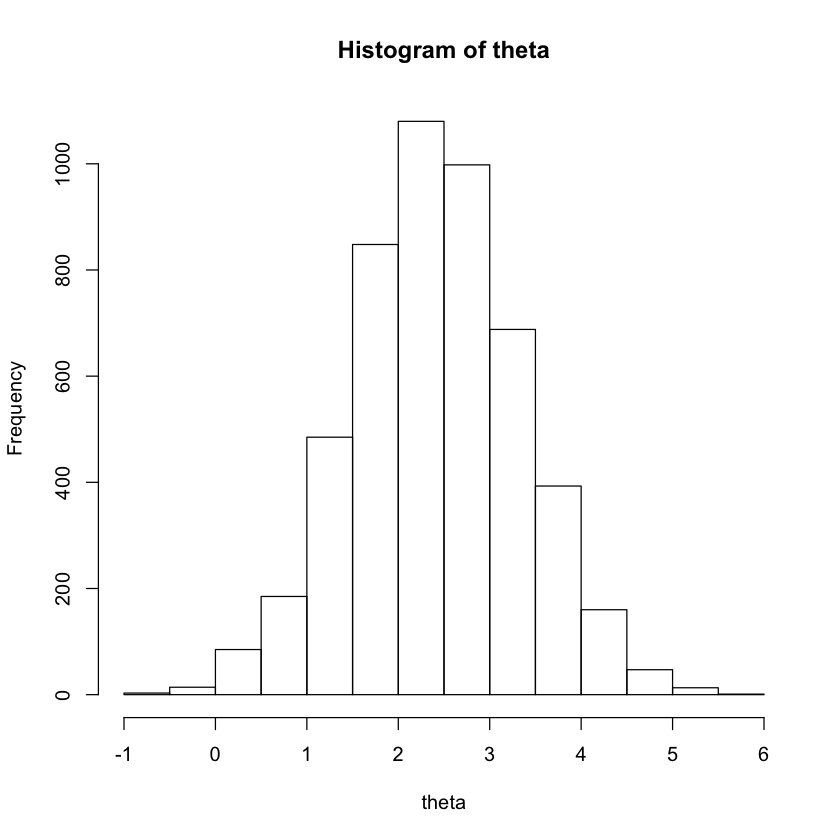

In [21]:
hist(theta)

In [22]:
mean(theta)

[1] 2.416291

In [23]:
var(theta)

[1] 0.8319306